In [1]:
## ARIMA model for house price

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Neighbourhood_model_data.csv")
print(df)

      NEIGHBOURHOOD_NAME  TAX_ASSESSMENT_YEAR  PREVIOUS_MEDIAN_PRICE  \
0          Arbutus-Ridge                 2007                0.80475   
1          Arbutus-Ridge                 2008                1.01700   
2          Arbutus-Ridge                 2009                1.22905   
3          Arbutus-Ridge                 2010                1.23490   
4          Arbutus-Ridge                 2011                1.22900   
5          Arbutus-Ridge                 2012                1.51500   
6          Arbutus-Ridge                 2013                1.90910   
7          Arbutus-Ridge                 2014                1.82600   
8          Arbutus-Ridge                 2015                1.82455   
9          Arbutus-Ridge                 2016                1.98200   
10         Arbutus-Ridge                 2017                2.36600   
11         Arbutus-Ridge                 2018                3.24700   
12         Arbutus-Ridge                 2019                3.1

In [8]:
df.describe()

,TAX_ASSESSMENT_YEAR,PREVIOUS_MEDIAN_PRICE,INTEREST_RATE,CURRENT_MEDIAN_PRICE
count,273.000000,273.000000,273.000000,273.000000
mean,2013.000000,1.141014,3.185256,1.240245
std,3.748529,0.847415,1.006144,0.893613
min,2007.000000,0.300000,2.395833,0.362000
25%,2010.000000,0.580900,2.700000,0.628500
50%,2013.000000,0.817000,2.775000,0.907700
75%,2016.000000,1.433950,3.000000,1.517000
max,2019.000000,5.321850,6.104167,5.321850


In [10]:
area_name = 'Downtown'

In [11]:
filtered_df = df.query('NEIGHBOURHOOD_NAME == @area_name')
filtered_df

,NEIGHBOURHOOD_NAME,TAX_ASSESSMENT_YEAR,PREVIOUS_MEDIAN_PRICE,INTEREST_RATE,CURRENT_MEDIAN_PRICE
13,Downtown,2007,0.307,6.104167,0.362
14,Downtown,2008,0.362,4.729167,0.411
15,Downtown,2009,0.411,2.395833,0.418
16,Downtown,2010,0.418,2.604167,0.417
17,Downtown,2011,0.417,3.000000,0.444
18,Downtown,2012,0.444,3.000000,0.462
19,Downtown,2013,0.462,3.000000,0.461
20,Downtown,2014,0.461,3.000000,0.450
21,Downtown,2015,0.450,2.775000,0.462
22,Downtown,2016,0.462,2.700000,0.503


In [12]:
truncated_df = filtered_df.drop(['NEIGHBOURHOOD_NAME', 'PREVIOUS_MEDIAN_PRICE'], axis = 1)
truncated_df

,TAX_ASSESSMENT_YEAR,INTEREST_RATE,CURRENT_MEDIAN_PRICE
13,2007,6.104167,0.362
14,2008,4.729167,0.411
15,2009,2.395833,0.418
16,2010,2.604167,0.417
17,2011,3.000000,0.444
18,2012,3.000000,0.462
19,2013,3.000000,0.461
20,2014,3.000000,0.450
21,2015,2.775000,0.462
22,2016,2.700000,0.503


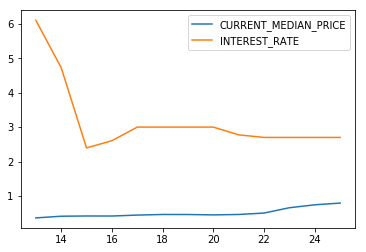

In [16]:
# plot

truncated_df[['CURRENT_MEDIAN_PRICE', 'INTEREST_RATE']].plot()
plt.show()

In [17]:
# Dickey Fuller (ADF) test.  to check if series is stationary

import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(df['CURRENT_MEDIAN_PRICE']))
print(sm.tsa.stattools.adfuller(df['INTEREST_RATE']))

(-4.338347820654315, 0.0003809797787311063, 13, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 279.20944729748015)
(-1066963409307269.1, 0.0, 14, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, -16921.300540958106)


In [18]:
# looks like the series is stationary

In [20]:
# naive regression
df['const']=1

model1=sm.OLS(endog=df['CURRENT_MEDIAN_PRICE'],exog=df['INTEREST_RATE'])
results1=model1.fit()
print(results1.summary())

                             OLS Regression Results                             
Dep. Variable:     CURRENT_MEDIAN_PRICE   R-squared:                       0.538
Model:                              OLS   Adj. R-squared:                  0.537
Method:                   Least Squares   F-statistic:                     317.3
Date:                  Thu, 04 Apr 2019   Prob (F-statistic):           1.41e-47
Time:                          05:25:08   Log-Likelihood:                -397.51
No. Observations:                   273   AIC:                             797.0
Df Residuals:                       272   BIC:                             800.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
INTEREST_RATE     0.3357  

In [21]:
df['diffS']=df['CURRENT_MEDIAN_PRICE'].diff()
df['diffM']=df['INTEREST_RATE'].diff()
model2=sm.OLS(endog=df['diffS'].dropna(),exog=df[['diffM']].dropna())
results2=model1.fit()
print(results2.summary())

                             OLS Regression Results                             
Dep. Variable:     CURRENT_MEDIAN_PRICE   R-squared:                       0.538
Model:                              OLS   Adj. R-squared:                  0.537
Method:                   Least Squares   F-statistic:                     317.3
Date:                  Thu, 04 Apr 2019   Prob (F-statistic):           1.41e-47
Time:                          05:29:07   Log-Likelihood:                -397.51
No. Observations:                   273   AIC:                             797.0
Df Residuals:                       272   BIC:                             800.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
INTEREST_RATE     0.3357  

In [22]:
print(sm.tsa.stattools.grangercausalitytests(df[['INTEREST_RATE','CURRENT_MEDIAN_PRICE']].dropna(),1))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7052  , p=0.0309  , df_denom=269, df_num=1
ssr based chi2 test:   chi2=4.7577  , p=0.0292  , df=1
likelihood ratio test: chi2=4.7166  , p=0.0299  , df=1
parameter F test:         F=4.7052  , p=0.0309  , df_denom=269, df_num=1
{1: ({'ssr_ftest': (4.705219331708524, 0.03094713640470254, 269.0, 1), 'ssr_chi2test': (4.757693896746166, 0.029167602258601676, 1), 'lrtest': (4.716563177027751, 0.029873393567303026, 1), 'params_ftest': (4.705219331708598, 0.03094713640470179, 269.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EF01FF2EF0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001EF040A4B00>, array([[0., 1., 0.]])])}


C:\Users\chira\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


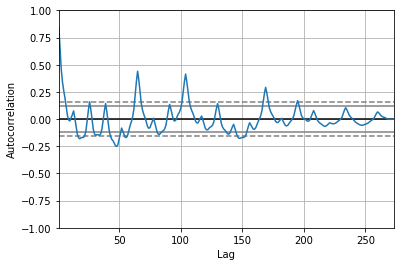

In [23]:
from pandas.tools.plotting import autocorrelation_plot

series = df['CURRENT_MEDIAN_PRICE']

autocorrelation_plot(series)

In [24]:
import itertools


## further exploration : digital ocean

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 7)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {}'.format(pdq[1]))
print('SARIMAX: {}'.format(pdq[1]))
print('SARIMAX: {}'.format(pdq[2]))
print('SARIMAX: {}'.format(pdq[2]))

print(len(pdq))
#print(len(seasonal_pdq))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1)
SARIMAX: (0, 0, 1)
SARIMAX: (0, 0, 2)
SARIMAX: (0, 0, 2)
343


In [25]:
import statsmodels.api as sm
import statsmodels

In [29]:
# hyper parameter tuning for pdq

import warnings

df['lag']=df['diffM'].shift()
df.dropna(inplace=True)
warnings.filterwarnings("ignore") # specify to ignore warning messages

models = {}

i = 0
for param in pdq:
    try:
        i+=1
        mod = statsmodels.tsa.arima_model.ARIMA(endog=df['CURRENT_MEDIAN_PRICE'],exog=df[['lag']],
                                        order=param
                                               )

        results = mod.fit()
        print("result for iteration " + str(i) +  " : " + str(results.aic))
        models[str(param)] = results.aic
    except Exception as e:
        print(e)
        print("Exception occured for iteration : " + str(i))

result for iteration 1 : 713.4052249674436
result for iteration 2 : 500.83838304470106
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
Exception occured for iteration : 3
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
Exception occured for iteration : 4
result for iteration 5 : 346.869813702006
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
Exception occured for iteration : 6
result for iteration 7 : 347.2731883743976
result for iteration 8 : 378.4643297980433
result for iteration 9 : 370.362855514997
result for iteration 10 : 365.5047888305101
result for iteration 11 : 346.10825554613433
result for iteration 12 : 342.01559921208235
result for iteration 

In [32]:
import numpy as np

models_filtered = {k:v for k,v in models.items() if not np.isnan(v)}
pdq = max(models_filtered, key=models_filtered.get)
print(pdq)

(0, 0, 0)


In [57]:
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error

#model3=sm.tsa.ARIMA(endog=df['Sales'],exog=df[['lag']],order=[1,0,2])
#results3=model3.fit()
#print(results3.summary())

sales_series = df['CURRENT_MEDIAN_PRICE']
lag_series = df['lag']

train_sales = sales_series[:int(0.8*(len(sales_series)))]
valid_sales = sales_series[int(0.8*(len(sales_series))):]

lag_train = lag_series[:int(0.8*(len(lag_series)))]
lag_valid = lag_series[int(0.8*(len(lag_series))):]

model4=sm.tsa.ARIMA(endog=train_sales.values,exog=lag_train.values,order=[1,0,2])
results4=model4.fit()


In [58]:
# make prediction on validation
print(len(lag_valid))
prediction = results4.forecast(exog=lag_valid, steps=len(lag_valid))
prediction[0]

54


array([2.51999752, 2.29924577, 1.95872722, 1.8387421 , 1.53764345,
       1.40691399, 1.41964116, 1.38086442, 1.33869016, 1.31887247,
       1.30567132, 1.2898157 , 1.28866593, 1.28711789, 1.28451865,
       1.28278721, 1.3884783 , 1.2377093 , 1.20711891, 1.2865517 ,
       1.29220955, 1.27963451, 1.27953374, 1.27946662, 1.27235997,
       1.27703814, 1.27937228, 1.27935906, 1.27935026, 1.38618884,
       1.23618423, 1.20610302, 1.28587498, 1.29175877, 1.27933423,
       1.27933372, 1.27933338, 1.27227121, 1.27697902, 1.2793329 ,
       1.27933283, 1.27933278, 1.3861772 , 1.23617647, 1.20609785,
       1.28587154, 1.29175648, 1.2793327 , 1.2793327 , 1.2793327 ,
       1.27227076, 1.27697872, 1.2793327 , 1.2793327 ])

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt


pred = pd.DataFrame(prediction[0])

rmse = sqrt(mean_squared_error(pred, valid_sales))
rmse

0.7811051714979799